In [4]:
!python -m pip install --upgrade pip setuptools wheel


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 6.7 MB/s  0:00:00

  Attempting uninstall: wheel

    Found existing installation: wheel 0.44.0

    Uninstalling wheel-0.44.0:

      Successfully uninstalled wheel-0.44.0

   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
   ---------------------------------------- 0/2 [wheel]
  Attempting uninstall: setuptools
   ---------------------------------------- 0/2 [wheel]
    Found existing installation: setuptools 75.1.0
   ---------------------------------

In [6]:
!pip install scipy



   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.1/38.5 MB 6.2 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/38.5 MB 7.4 MB/s eta 0:00:05
   ----- ---------------------------------- 5.8/38.5 MB 7.3 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/38.5 MB 6.8 MB/s eta 0:00:05
   ------- -------------------------------- 7.3/38.5 MB 6.3 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.5 MB 5.9 MB/s eta 0:00:06
   --------- ------------------------------ 8.9/38.5 MB 5.6 MB/s eta 0:00:06
   ---------- ----------------------------- 9.7/38.5 MB 5.3 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/38.5 MB 5.2 MB/s eta 0:00:06
   ----------- ---------------------------- 11.0/38.5 MB 4.9 MB/s eta 0:00:06
   ----------- ---------------------------- 11.5/38.5 MB 4.8 MB/s eta 0:00:06
   

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load your CSV file (update path as needed)
df = pd.read_csv("C:\\Users\\kapul\\Downloads\\bigdata_ab_test_dataset.csv")


# 1. Overall Conversion Rate by Group
conversion_by_group = df.groupby('group')['converted'].mean()

# 2. Conversion by Device and Group
conversion_by_device = df.groupby(['device', 'group'])['converted'].mean().unstack()

# 3. Conversion by Region and Group
conversion_by_region = df.groupby(['region', 'group'])['converted'].mean().unstack()
conversion_by_region

group,A,B
region,,
Asia,0.144724,0.179655
Europe,0.144811,0.179674
North America,0.144011,0.177408
South America,0.145629,0.177566


In [14]:
conversion_by_device

group,A,B
device,,
Desktop,0.143895,0.177868
Mobile,0.145852,0.179163
Tablet,0.143067,0.178496


In [15]:
conversion_by_group 

group
A    0.144794
B    0.178578
Name: converted, dtype: float64

In [19]:
# 4. T-Test
group_A = df[df['group'] == 'A']['converted']
group_B = df[df['group'] == 'B']['converted']
t_stat, p_value = ttest_ind(group_A, group_B)
group_A

0         0
4         0
7         0
8         0
9         0
         ..
999982    1
999987    1
999992    0
999994    0
999998    0
Name: converted, Length: 500234, dtype: int64

In [20]:
group_B

1         0
2         1
3         0
5         0
6         0
         ..
999993    1
999995    0
999996    0
999997    1
999999    1
Name: converted, Length: 499766, dtype: int64

In [21]:
t_stat, p_value

(-45.93024844506886, 0.0)

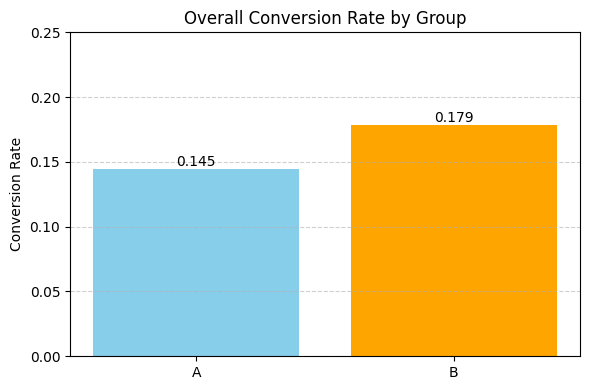

In [22]:
# 5. Plot Overall Conversion Rate
plt.figure(figsize=(6, 4))
bars = plt.bar(conversion_by_group.index, conversion_by_group.values, color=['skyblue', 'orange'])
plt.title('Overall Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.25)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.3f}', 
             ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


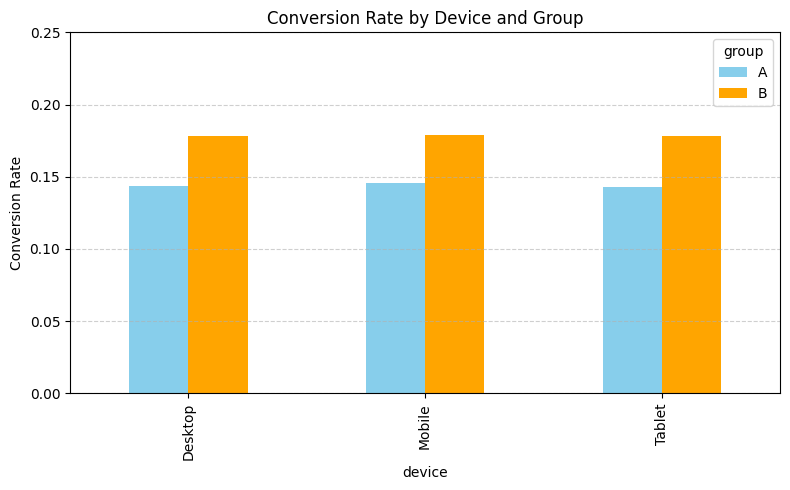

In [23]:
# 6. Plot by Device
conversion_by_device.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Conversion Rate by Device and Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


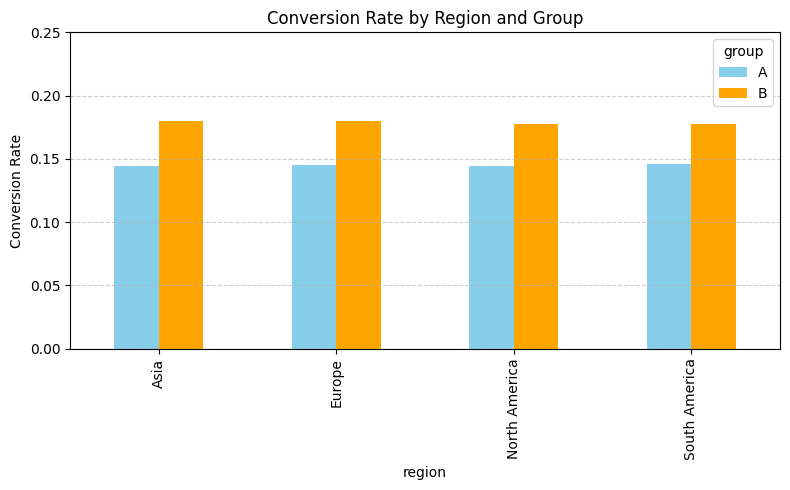

In [24]:
# 7. Plot by Region
conversion_by_region.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Conversion Rate by Region and Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [25]:
# 8. Print Insights
print("Conversion Rates by Group:\n", conversion_by_group.round(4), "\n")
print(f"T-Test Result: t-stat = {t_stat:.3f}, p-value = {p_value:.4e}")
print("Conclusion:", "Statistically significant difference" if p_value < 0.05 else "No significant difference", "\n")
print("Conversion by Device:\n", conversion_by_device.round(4), "\n")
print("Conversion by Region:\n", conversion_by_region.round(4))

Conversion Rates by Group:
 group
A    0.1448
B    0.1786
Name: converted, dtype: float64 

T-Test Result: t-stat = -45.930, p-value = 0.0000e+00
Conclusion: Statistically significant difference 

Conversion by Device:
 group         A       B
device                 
Desktop  0.1439  0.1779
Mobile   0.1459  0.1792
Tablet   0.1431  0.1785 

Conversion by Region:
 group               A       B
region                       
Asia           0.1447  0.1797
Europe         0.1448  0.1797
North America  0.1440  0.1774
South America  0.1456  0.1776
